# Data Science - Projekt zaliczeniowy 1 sem. #
## Daniel Bich##

Projekt ma za zadanie przedstawić umiejętności nabyte na pierwszym semestrze. W projekcie będę korzystał z danych z książki "Data Analysis Using SQL and Excel" Gordon S. Linoff

### Import modułów ###

In [261]:
# Import modułów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline 

### Import danych ###

Poniższy schemat pokazuje strukturę danych oraz połączenia między tabelami.


![](struktura_danych.png "Źródło: Data Analysis Using
SQL and Excel, Gordon S. Linoff")


In [262]:
#Import danych
Customer = pd.read_csv('data/customers.txt', header=0, sep="\t",index_col='customerid', low_memory=False) #Funkcja importu danych w Pandas dla plików CSV
Calendar = pd.read_csv('data/calendar.txt', header=0, sep="\t", low_memory=False)
Campaign = pd.read_csv('data/campaigns.txt', header=0, sep="\t", low_memory=False, index_col='campaignid')
Orders = pd.read_csv('data/orders.txt', header=0, sep="\t", low_memory=False, encoding = "ISO-8859-1", index_col='orderid') 
                      # wyskakiwał błąd kodowania "utf-8" dlatego zmienione kodowanie na "ISO-8859-1"
Orderline = pd.read_csv('data/orderlines.txt', header=0, sep="\t", low_memory=False, index_col='orderlineid')
ZipCensus = pd.read_csv('data/ZipCensus.txt', header=0, sep="\t", low_memory=False)
Zipcountry = pd.read_csv('data/zipcounty.txt', header=0, sep="\t", low_memory=False, encoding = "ISO-8859-1")

In [263]:
Calendar.head() #Sprawdzenie jak wygląda DataFrame z datami

,DATE,ISO,datenum,DOW,dowint,Year,Month,dom,monthstr,doy,...,numholidays,holidayname,holidaytype,national,minor,christian,jewish,muslim,chinese,other
0,1950-01-01 00:00:00,1950-01-01,18264,Sun,1,1950,1,1,Jan,1,...,1,New Year's Day,national,New Year's Day,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-02 00:00:00,1950-01-02,18265,Mon,2,1950,1,2,Jan,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-03 00:00:00,1950-01-03,18266,Tue,3,1950,1,3,Jan,3,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-04 00:00:00,1950-01-04,18267,Wed,4,1950,1,4,Jan,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-05 00:00:00,1950-01-05,18268,Thu,5,1950,1,5,Jan,5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
#Wygodniejsze wydaje się operowanie na danych, gdyby Index wierszy był datą stąd dane zostają jeszcze raz załadowane
Calendar = pd.read_csv('data/calendar.txt', header=0, sep="\t", low_memory=False, parse_dates=True, index_col='DATE')



In [265]:
Calendar.head() #Ponowne sprawdzenie jak załadowały się dane - tym razem data jest indeksem dla każdego wiersza

,ISO,datenum,DOW,dowint,Year,Month,dom,monthstr,doy,Mondays,...,numholidays,holidayname,holidaytype,national,minor,christian,jewish,muslim,chinese,other
DATE,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1950-01-01,18264,Sun,1,1950,1,1,Jan,1,0,...,1,New Year's Day,national,New Year's Day,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-02,1950-01-02,18265,Mon,2,1950,1,2,Jan,2,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-03,1950-01-03,18266,Tue,3,1950,1,3,Jan,3,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,1950-01-04,18267,Wed,4,1950,1,4,Jan,4,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,1950-01-05,18268,Thu,5,1950,1,5,Jan,5,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Poznanie struktury danych i wstępna analiza ###

In [266]:
Customer.head() #Funkcja służy do wyświetlenia pięciu pierwszych wieszy DataFrame'u

,householdid,gender,firstname
customerid,,,
174596,53949999,M,DANIEL
68239,49927024,M,JIM
10203,20914414,F,DONNA
174288,53957047,F,DIONE
68099,49927024,M,JIM


In [267]:
Customer.tail() #Funkcja służy do wyświetlenia pięciu ostatnich wieszy DataFrame'u

,householdid,gender,firstname
customerid,,,
174268,53950750,M,WILLIAM
174594,53949991,M,DANIEL
139779,45334427,M,PARK
174256,53949982,M,GREGG
163204,22279373,M,THOMAS


In [268]:
Campaign.info() #Funkcja info pozwala pobrać wyświetlic podstawowe informacje o zbiorze danych

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 2001 to 2239
Data columns (total 4 columns):
campaignname        0 non-null float64
channel             239 non-null object
discount            239 non-null int64
freeshippingflag    239 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 9.3+ KB


In [269]:
Campaign.shape # pozwala sprawdzić wymiary DataFrame'u

(239, 4)

In [270]:
Orderline.describe() #Funkcja describe pozwala wstępnie przeanalizowac dane (liczba rekordów,średnia, 
                      #odchylenie standardowe, wartośc minimalną/maksymalną oraz kwartyle)

,orderid,productid,unitprice,numunits,totalprice
count,2.860170e+05,286017.000000,281033.000000,286017.000000,286017.000000
mean,1.177575e+06,11715.230941,46.276002,1.522231,47.930355
std,1.645572e+05,989.714063,105.622663,14.690649,109.548292
min,9.999920e+05,10001.000000,0.000000,0.000000,0.000000
25%,1.055595e+06,11014.000000,10.000000,1.000000,10.050000
50%,1.109353e+06,11179.000000,17.500000,1.000000,18.000000
75%,1.263197e+06,12719.000000,27.310000,1.000000,30.000000
max,1.643157e+06,14040.000000,6250.000000,3000.000000,6780.000000


Z danych można wyczytać, że baza zawiera 286017 rekordów, średnia wartość per zamówienie wynosiła 47,93 a mediana 18,00 itd.

Interesujące nas dane możemy także wyciągać pojedynczo używają odpowiednich funkcji - przykłady poniżej

In [271]:
print('Ilość rekordów wynosi: ', Orderline['productid'].count())
print('Średnia wartość zamówień wynosiła: ', Orderline['totalprice'].mean())
print('Minimalna wartość zamówienia wynosiła: ', Orderline['totalprice'].min())
print('Maksymalna wartość zamówienia wynosiła: ', Orderline['totalprice'].max())
print('Mediana (kwartyl rzędu 1/2) wartość zamówień wynosiła: ', Orderline['totalprice'].median())

Ilość rekordów wynosi:  286017
Średnia wartość zamówień wynosiła:  47.93035483900342
Minimalna wartość zamówienia wynosiła:  0.0
Maksymalna wartość zamówienia wynosiła:  6780.0
Mediana (kwartyl rzędu 1/2) wartość zamówień wynosiła:  18.0


Jeżeli chcemy sprawdzić kilka skrajnych wartości (np. zamówienia z najwyższą sumą zamówień) możemy wykorzystać funkcję sortowania.

In [272]:
Orderline.sort_values(by="totalprice", ascending=False).head()

,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice
orderlineid,,,,,,,
1074944,1061106,10929,2012-12-14 00:00:00,2012-12-15 00:00:00,16.95,400,6780.00
1423142,1273001,11808,2015-03-22 00:00:00,2015-04-02 00:00:00,6250.00,1,6250.00
1150703,1117606,11808,2014-06-16 00:00:00,2014-06-17 00:00:00,6250.00,1,6250.00
1435104,1244054,11807,2015-04-11 00:00:00,2015-04-13 00:00:00,5967.37,1,5967.37
1873140,1556135,12494,2016-05-12 00:00:00,2016-05-13 00:00:00,5.50,1000,5500.00


In [273]:
print('Customer')
print(Customer.head()) 
print('Calendar')
print(Calendar.head())
print('Campaign')
print(Campaign.head())
print('Orders')
print(Orders.head())
print('Orderline')
print(Orderline.head())
print('ZipCensus')
print(ZipCensus.head())
print('Zipcountry')
print(Zipcountry.head())

Customer
            householdid gender firstname
customerid                              
174596         53949999      M    DANIEL
68239          49927024      M       JIM
10203          20914414      F     DONNA
174288         53957047      F     DIONE
68099          49927024      M       JIM
Calendar
                   ISO  datenum  DOW  dowint  Year  Month  dom monthstr  doy  \
DATE                                                                           
1950-01-01  1950-01-01    18264  Sun       1  1950      1    1      Jan    1   
1950-01-02  1950-01-02    18265  Mon       2  1950      1    2      Jan    2   
1950-01-03  1950-01-03    18266  Tue       3  1950      1    3      Jan    3   
1950-01-04  1950-01-04    18267  Wed       4  1950      1    4      Jan    4   
1950-01-05  1950-01-05    18268  Thu       5  1950      1    5      Jan    5   

            Mondays  ...  numholidays     holidayname  holidaytype  \
DATE                 ...                                        

### Metody łączenia danych ###

In [274]:
#1 metoda
Orders_customerid = Orders.reset_index() 
Orders_customerid = Orders_customerid.set_index('customerid')

list=[Customer, Orders_customerid]
Customer_Orders = pd.concat(list, axis=1, join='inner') # join: inner-> "przejmowane" są jedynie wiersze które występują we wszystkich DF, outer -> brakujące wartości wypeniane są NaN'ami
Customer_Orders.head()

,householdid,gender,firstname,orderid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
customerid,,,,,,,,,,,,,
174596,53949999,M,DANIEL,1391159,2204,2015-09-27 00:00:00,MONTVALE,NJ,07645,AE,44.95,1,1
68239,49927024,M,JIM,1391160,2237,2015-09-24 00:00:00,NEW YORK,NY,10036,DB,0.00,1,100
10203,20914414,F,DONNA,1391161,2141,2015-09-24 00:00:00,HAMILTON TOWNSHIP,NJ,08619,VI,62.05,3,3
174288,53957047,F,DIONE,1391162,2236,2015-09-24 00:00:00,ARBOLES,CO,81121,VI,100.00,2,2
68099,49927024,M,JIM,1391163,2237,2015-09-24 00:00:00,NEW YORK,NY,10036,DB,0.00,2,2


In [275]:
#2 metoda
Customer2 = Customer.reset_index()
Orders2 = Orders.reset_index()

Customer_Orders2 = pd.merge(Customer2, Orders2) # można używać parametru 'on' który definuje wg której kolumny dane będą łączone
#domyslnie merge tworzy inner join
Customer_Orders2.head()

,customerid,householdid,gender,firstname,orderid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
0,174596,53949999,M,DANIEL,1391159,2204,2015-09-27 00:00:00,MONTVALE,NJ,07645,AE,44.95,1,1
1,68239,49927024,M,JIM,1391160,2237,2015-09-24 00:00:00,NEW YORK,NY,10036,DB,0.00,1,100
2,10203,20914414,F,DONNA,1391161,2141,2015-09-24 00:00:00,HAMILTON TOWNSHIP,NJ,08619,VI,62.05,3,3
3,174288,53957047,F,DIONE,1391162,2236,2015-09-24 00:00:00,ARBOLES,CO,81121,VI,100.00,2,2
4,68099,49927024,M,JIM,1391163,2237,2015-09-24 00:00:00,NEW YORK,NY,10036,DB,0.00,2,2


### Analiza - wykresy ###

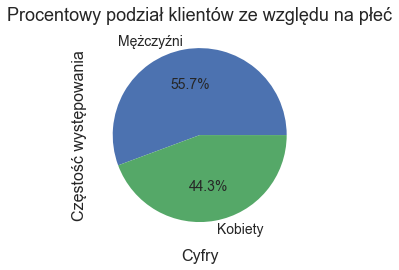

In [276]:
# Procentowy podział klientów ze względu na płeć
M = Customer.gender[Customer.gender=='M'].count()
F = Customer.gender[Customer.gender=='F'].count()
opisy = ['Mężczyźni', 'Kobiety']
MF=[M,F]
plt.pie(MF, labels=opisy, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Procentowy podział klientów ze względu na płeć', size=18)
plt.xlabel('Cyfry', size=16)
plt.ylabel('Częstość występowania', size=16)


plt.show()

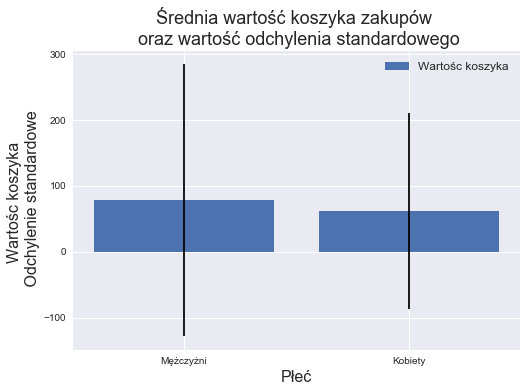

In [297]:
# Średnia wartość koszyka ze względu na płeć oraz odchylenie standardowe wartości koszyka ze względu na płeć
srednia = Customer_Orders.groupby(['gender']).mean()
srednia_MF = [srednia.totalprice.loc['M'], srednia.totalprice.loc['F']]
std = Customer_Orders.groupby(['gender']).std()
std_MF = [std.totalprice.loc['M'], std.totalprice.loc['F']]
plt.title('Średnia wartość koszyka zakupów \n oraz wartość odchylenia standardowego', size=18)
plt.bar(opisy, srednia_MF, yerr=std_MF)
plt.ylabel('Wartośc koszyka \n Odchylenie standardowe', size=16)
plt.xlabel('Płeć', size=16)
plt.legend(('Wartośc koszyka', 'Czestość cyfr \n w wartościach zamówień'), loc='upper right', fontsize=12)
plt.show()

In [278]:
# Wartość odchylenia standardowego wydaje się bardzo wysoka dlatego kontrolnie sprawdzam wartość maksymalną zamówień
max = Customer_Orders.groupby(['gender']).max()
max.totalprice

gender
F    9137.09
M    9848.96
Name: totalprice, dtype: float64

In [279]:
# Sprawdzam wartość minimalną koszyka
min = Customer_Orders.groupby(['gender']).min()
min.totalprice

gender
F    0.0
M    0.0
Name: totalprice, dtype: float64

In [280]:
# Sprawdzam medianę wartości koszyka
mediana = Customer_Orders.groupby(['gender']).median()
mediana.totalprice

gender
F    24.95
M    25.95
Name: totalprice, dtype: float64

In [281]:
# Wniosek - duże odchylenie wynika z wartości skrajnych (maksymalna wartość koszyka)

In [282]:
# Łączny obrót per rok ze względu na płeć
Customer_Orders.orderdate= pd.to_datetime(Customer_Orders.orderdate)
Customer_Orders['rok']= Customer_Orders.orderdate.dt.year
obroty = Customer_Orders.groupby(['gender','rok']).sum()
obroty.head()

householdid      orderid  campaignid  totalprice  numorderlines  \
gender rok                                                                      
F      2009   76562483141   2761300591     5878154    87660.29           3494   
       2010  204107140949   7610949600    16095757   321331.54           9220   
       2011  278535687535  10692739272    22240782   473007.38          12530   
       2012  202673767942   7878237264    16160003   454160.82          10082   
       2013  321507231970  13009941097    25935090   806967.54          15558   

             numunits  
gender rok             
F      2009      4656  
       2010     14050  
       2011     19987  
       2012     12596  
       2013     18476

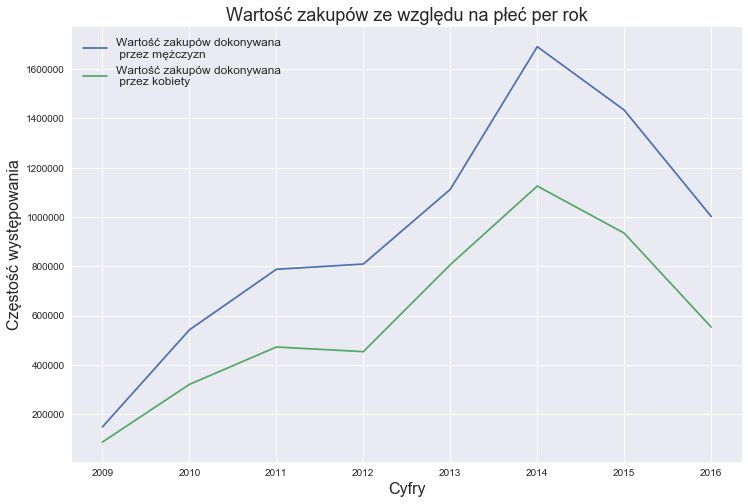

In [292]:
obroty_M = obroty.loc['M',:].loc[:,'totalprice']
obroty_F = obroty.loc['F',:].loc[:,'totalprice']
lata=['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
plt.figure(figsize=[12,8])
plt.plot(lata, obroty_M)
plt.plot(lata, obroty_F)
plt.title('Wartość zakupów ze względu na płeć per rok', size=18)
plt.legend(('Wartość zakupów dokonywana \n przez mężczyzn', 'Wartość zakupów dokonywana \n przez kobiety'), loc='upper left', fontsize=12)
plt.xlabel('Cyfry', size=16)
plt.ylabel('Częstość występowania', size=16)

plt.style.use('seaborn')
plt.show()


### Rozkład Benforda ###
Sprawdzenie hipotezy:

H0 - pierwsze cyfry z łącznej wartości zamówień podlegają rozkładowi Benforda

H1 - pierwsze cyfry z łącznej wartości zamówień niepodlegają rozkładowi Benforda

$ P_k = log_{10}\frac{k + 1}{k} = log_{10}(1+\frac{1}{k})$

Aby nie korzystać z gotowych danych z internetu dane dla rozkładu zostaną wygenerowane poniżej:

In [284]:
benford = []
for x in range(9):
    n = math.log10(1+1/(x+1))
    benford.append(n)
print(benford)

[0.3010299956639812, 0.17609125905568124, 0.12493873660829993, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]


In [285]:
Orderline = Orderline.reset_index()
jednostkowe_ceny=Orderline['unitprice'].dropna() # wydzielenie danych z DataFrame'u Orderlines
wartosc_zamowien=Orderline['totalprice'] .dropna()

In [286]:
jednostkowe_ceny.isna().sum()

0

In [287]:
wartosc_zamowien.head()

0    18.00
1    20.00
2    19.12
3    14.95
4    20.00
Name: totalprice, dtype: float64

In [288]:
def licz_liczby(dane): #funkcja sprowadzająca ceny to jednego rzędu wielkości oraz liczy procentową 
    #częstość występowania danych liczb
    for x in range(len(dane)):
        while dane[x]>=10:
            dane[x]=dane[x]/10
    pierwsze_cyfry=[int(x) for x in sorted(dane)]
    lista_liczb=[1,2,3,4,5,6,7,8,9]
    licznik_liczb=[]
    
    for i in lista_liczb:
        licznik=pierwsze_cyfry.count(i)
        licznik_liczb.append(licznik)
        #suma_licznik=sum(licznik_liczb)
    procentowy_podzial=[(i/sum(licznik_liczb)) for i in licznik_liczb]
    procentowy_podzial=procentowy_podzial
    return procentowy_podzial

In [289]:
lista_liczb=[1,2,3,4,5,6,7,8,9] #lista liczb na potrzeby rysowania wykresu

#Wykonanie funkcji dla dwóch zbiorów
proc_jednostkowe_ceny=licz_liczby(jednostkowe_ceny[:100000]) #ograniczenie wielkości zbioru do analizy ze względu na wydajność
proc_wartosc_zamowien=licz_liczby(wartosc_zamowien[:100000])

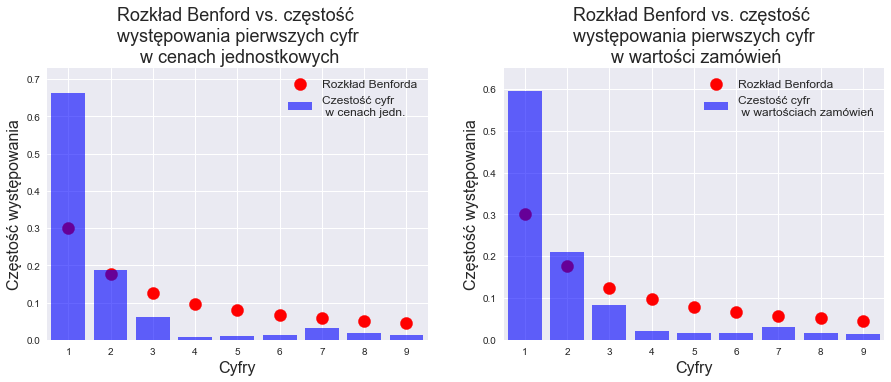

In [290]:
plt.figure(figsize=[15,5])
#Wykres 1.
plt.subplot(1,2,1)
plt.title('Rozkład Benford vs. częstość \n występowania pierwszych cyfr \n w cenach jednostkowych', size=18)
plt.scatter(lista_liczb, benford, color='red', s=150)
plt.bar(lista_liczb,proc_jednostkowe_ceny, color='blue', alpha=0.6)
plt.legend(('Rozkład Benforda', 'Czestość cyfr \n w cenach jedn.'), loc='upper right', fontsize=12)
plt.xlabel('Cyfry', size=16)
plt.ylabel('Częstość występowania', size=16)
plt.xlim(0.5, 9.5)
plt.ylim(0, 0.73)
plt.style.use('seaborn')

#Wykres 2.
plt.subplot(1,2,2)
plt.title('Rozkład Benford vs. częstość \n występowania pierwszych cyfr \n w wartości zamówień', size=18)
plt.scatter(lista_liczb, benford, color='red', s=150)
plt.bar(lista_liczb,proc_wartosc_zamowien, color='blue', alpha=0.6)
plt.legend(('Rozkład Benforda', 'Czestość cyfr \n w wartościach zamówień'), loc='upper right', fontsize=12)
plt.xlabel('Cyfry', size=16)
plt.ylabel('Częstość występowania', size=16)
plt.xlim(0.5, 9.5)
plt.ylim(0, 0.65)
plt.style.use('seaborn')

plt.show()

Cyfra "1" występują znacząco częściej niz pozostałe w związku z czym hipoteza H0 zostaje przyjęta za prawdziwą.